# Remoção de ruído de áudios utilizando Python e a FFT

O exemplo abaixo demonstra a adição de ruído a uma senóide e a aplicação da FFT e seus espectros para realizar a filtragem

## Parte 1 - processamento simples de senóides 

Nesta primeira etapa geramos uma senóide considerada "limpa" -linha 14 - e adicionamos um ruído Gaussiano (ruído branco) - linha 18. Após isso, aplicamos a FFT sobre o sinal e calculamos sua densidade espectral (PSD). Utilizando um threshold de 100, filtramos apenas frequencias maiores que este valor e zeramos qualquer outra para termos a senóide limpa novamente.

### 1. Gerar os sinais 

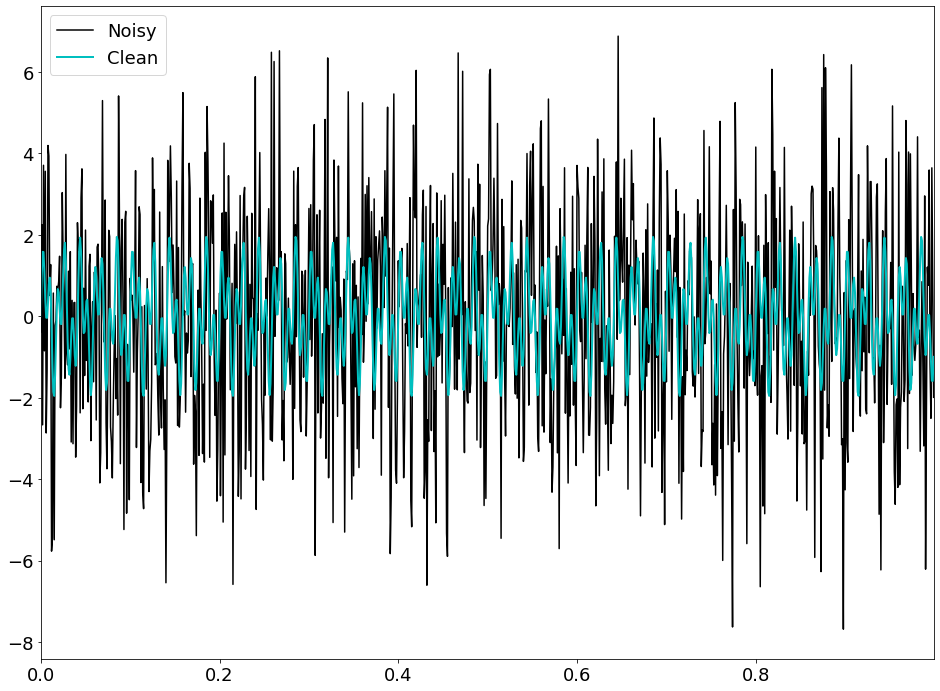

In [396]:
import numpy as np
import matplotlib.pyplot as plt
import IPython

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

# criar um sinal simples com duas frequencias
#dt = 0.00001 # =>>>>>>>> ALTERAR PARA dt PARA ISSO AQUI SE QUISER ESCUTAR ALGUMA COISA DO OUTPUT ALI EMBAIXO
dt = 0.001 # dt eh o intervalo de samples
t = np.arange(0, 1, dt) # alterado para 10 para poder escutar
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # os picos serao em 50 e 120
f_clean = f

# adiciona ruido
f = f + 2.5*np.random.randn(len(t)) # variar amplitude # ruído Gaussiano (ruído branco)

# plota os graficos so para visualizar
plt.plot(t, f, color='k', LineWidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='c', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()


### 2. Computar a FFT e pegar a densidade espectral


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


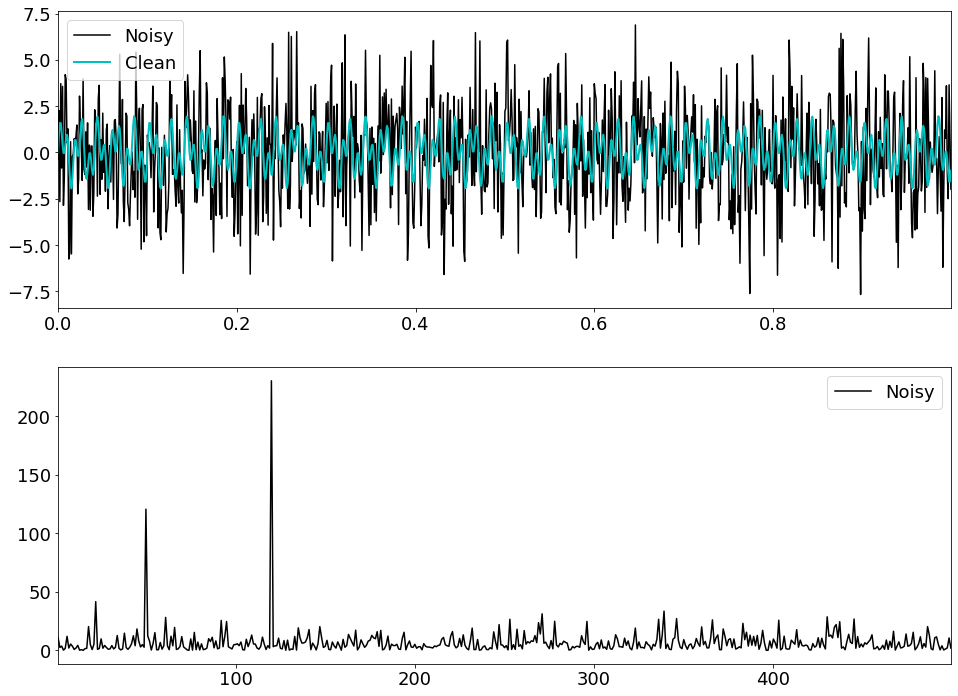

In [397]:
# computa a FFT
n = len(t)
# compute the fft in the noisy signal
fhat = np.fft.fft(f,n)
# power sepectrum 
PSD = fhat * np.conj(fhat) / n

# create x-axis of frequencies
freq = (1/(dt*n)) * np.arange(n)

# only plot the first half of
L = np.arange(1, np.floor(n/2), dtype = 'int')

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, f, color='k', LineWidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='c', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='k', LineWidth=1.5, label='Noisy')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

### 3. Filtra o ruído utilizando a potencia de espectro
Neste exemplos utilizamos um threshold de 100. Então basicamente mantemos valores maiores que 100 e zeramos os outros. A partir disso, faremos a FFT inversa para ter o sinal limpo novamente.

C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


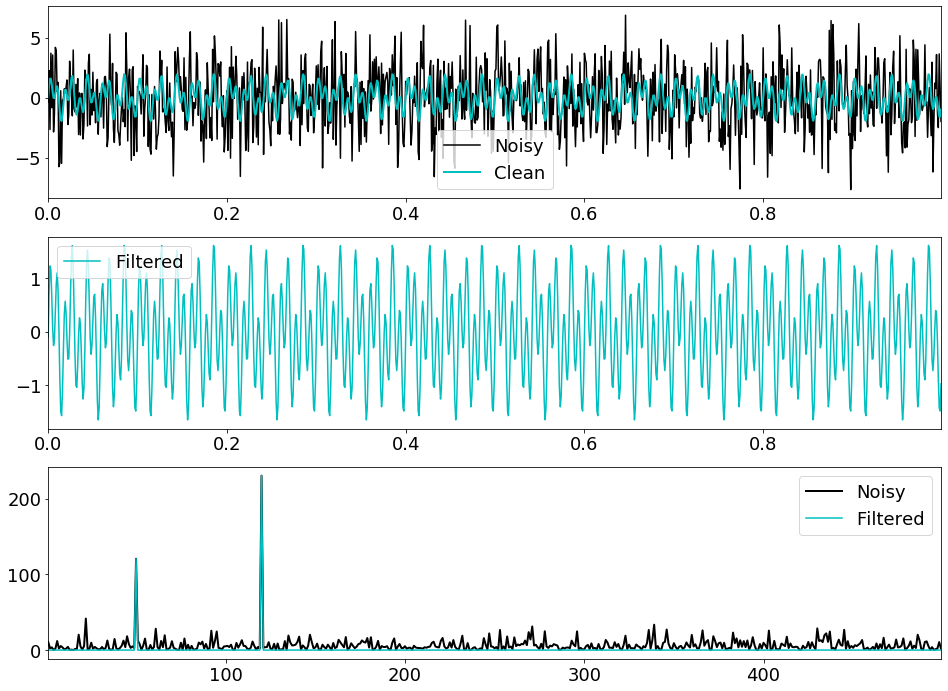

In [398]:
# Use PSD to filter out the noise
indices = PSD > 100 # acha todas as frequencias maior que esse threshold
PSDclean = PSD * indices # zera as outras
fhat = indices * fhat # zera os menores coeficientes de Fourier em Y
ffilt = np.fft.ifft(fhat) # faz a FFT inversa para pegar o sinal filtrado

fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t, f, color='k', LineWidth=1.5, label='Noisy')
plt.plot(t, f_clean, color='c', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t, ffilt, color='c', LineWidth=1.5, label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='k', LineWidth=2, label='Noisy')
plt.plot(freq[L], PSDclean[L], color='c', LineWidth=1.5, label='Filtered')
plt.xlim(freq[L[0]], freq[L[-1]])
plt.legend()

plt.show()

### Sinal f_clean 

In [129]:
IPython.display.Audio(data=f_clean, rate=n)

### Sinal f_clean com ruído

In [130]:
IPython.display.Audio(data=f, rate=n)

### Filtrado (resultado final)

In [132]:
IPython.display.Audio(data=ffilt, rate=n)

## Parte 2 - Mesma abordagem da parte 1, porém utilizando áudios caseiros, alterando valores e analisando os resultados


In [422]:
import IPython
import matplotlib.pyplot as plt
import scipy
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
from numpy.fft import *
import numpy as np

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

# ######################################## CARREGA OS AUDIOS AQUI ####################################################
clean_rate, clean = wavfile.read('voz.wav') # CLEAN

noise_rate, noise = wavfile.read('TRAFFIC.wav') # RUIDO

fixed_rate = 48000

N = noise.shape[0] #[0]
print ("Complete Samplings N", N)

# quantos segundos eh o audio
type(N)
secs = N / float(noise_rate)
print ("secs", secs)

# intervalo entre cada sample
Ts = 1.0/noise_rate
print ("Timestep between samples Ts", Ts)

# pega numpy array
t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray

######################### RUIDO BRANCO EH ESSE AQUI ###########################
#noise = 200*np.random.randn(len(t)) # variar amplitude # ruído Gaussiano >>>> (ruído branco) <<<<

############################ TESTES ##########################
## testando voz.wav com ruido branco ###
# 1 multiplicando ruido por 200 nao rolou
# 2 vamos ver com 400; nao mudou tbm
# 3 testando agora diminuindo a amplitude do clean ali embaixo (dividindo por 8) e mantendo o ruido em 400; nao rolou tbm

## testando voz.wav agora com o ruido do trafego (TRAFFIC ali de cima) (som "caseiro") ###
# 1 traffic normal (sem mexer na amplitude) nao rolou; threshold inicial 6
# 2 diminuindo a amplitude do traffic em 1/8 tbm nao rolou, mesmo alterando o threshold para 6, 5 e 1

## ultimo teste, ruido de trafego porem com a senoide limpa da parte 1 ###
# 1 multiplicando a senoide por 1000, dividindo noise por 32, threshold de 1, nao rolou
# 2 mudando threshold pra 0.25; nao rolou tbm
# 3 dividindo noise por 64 agora; nao rolou
# 4 trocando de 50t para 500t e 120t para 1200t e dividino o noise por / 8; threshold de 1.5 nao rolou e threshold de 0.75 tbm n

################################ SENOIDE LIMPA DA PARTE 1 EH ESSA AQUI ###################################
#clean = 1000*(np.sin(2*np.pi*500*t) + np.sin(2*np.pi*1200*t))

# ############ AQUI EH ONDE ADICIONA O LIMPO + RUIDO, A DIMINUICAO DE AMPLITUDE EH A PROPRIA DIVISAO, SO TROCAR OS VALORES
#noise = (noise / 2)
noisy = clean + noise

Complete Samplings N 720000
secs 15.0
Timestep between samples Ts 2.0833333333333333e-05


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  del sys.path[0]
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead


### Limpo

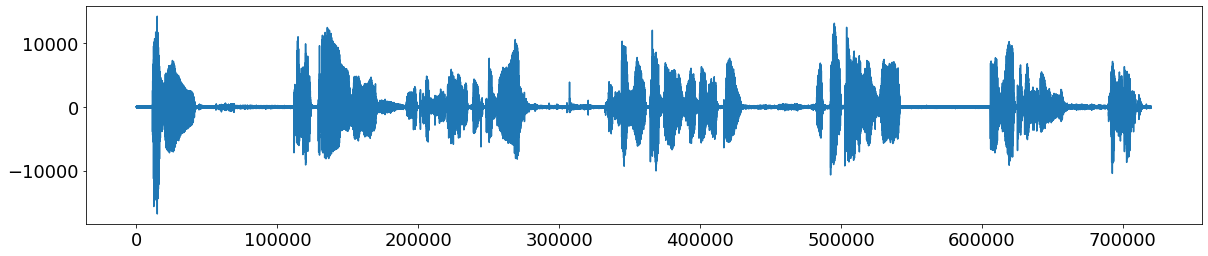

In [407]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(clean)

IPython.display.Audio(data=clean, rate=fixed_rate)

### Ruído

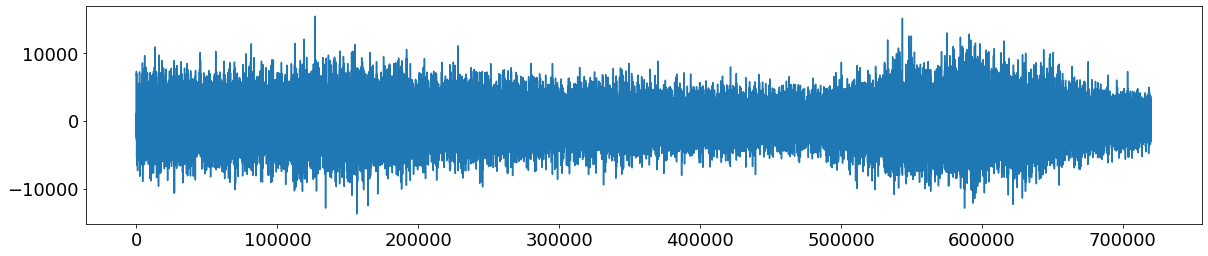

In [408]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noise)

IPython.display.Audio(data=noise, rate=fixed_rate)

### Limpo + Ruído

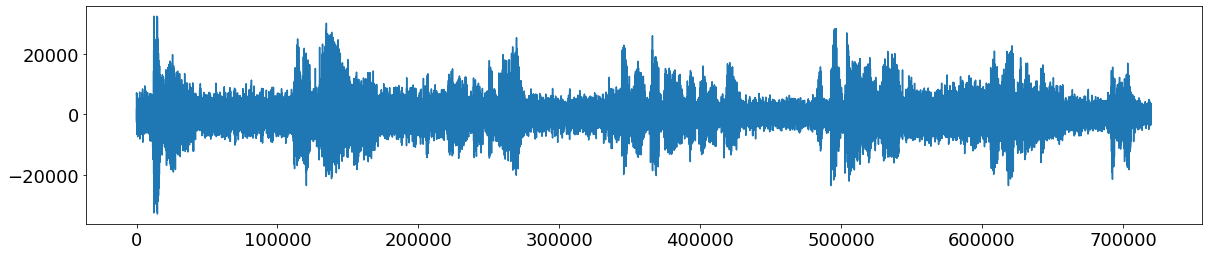

In [423]:
fig, ax = plt.subplots(figsize=(20,4))
ax.plot(noisy)

IPython.display.Audio(data=noisy, rate=fixed_rate)

### Aplica FFT no sinal composto

C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


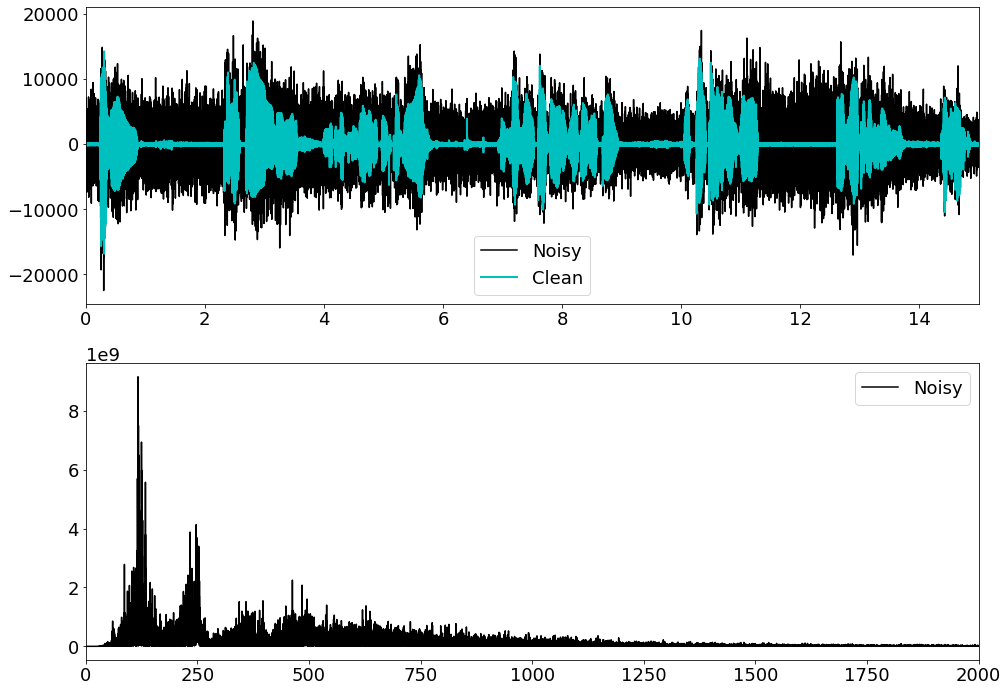

In [419]:
# :::::: computa a FFT do sinal completo (limpo + ruido) :::::::::::::::;
n = len(t)
# compute the fft in the noisy signal
fhat = np.fft.fft(noisy,n)
# power sepectrum 
PSD = fhat * np.conj(fhat) / n

# create x-axis of frequencies
freq = (1/(Ts*n)) * np.arange(n)
# only plot the first half of
L = np.arange(1, np.floor(n/2), dtype = 'int')

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, noisy, color='k', LineWidth=1.5, label='Noisy')
plt.plot(t, clean, color='c', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], PSD[L], color='k', LineWidth=1.5, label='Noisy')
plt.xlim(0, 2000)
plt.legend()

plt.show()

### Parte do threshold 

In [456]:
# usa PSD (power spectre) 
indices = PSD > 4 #################### <<<<<<< ESSE EH O THRESHOLD QUE EH ALTERADO PARA TESTAR ###################
PSDclean = PSD * indices # zera as outras

fhat = indices * fhat # zera os menores coeficientes de Fourier em Y
ffilt = np.fft.ifft(fhat) # faz a FFT inversa para pegar o sinal filtrado

[-3242393.             +0.j           -30417.49817886+101666.02212915j
   209758.20130831+120240.12663978j ...   139557.42747187+111099.83389076j
   209758.20130831-120240.12663978j   -30417.49817886-101666.02212915j]


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


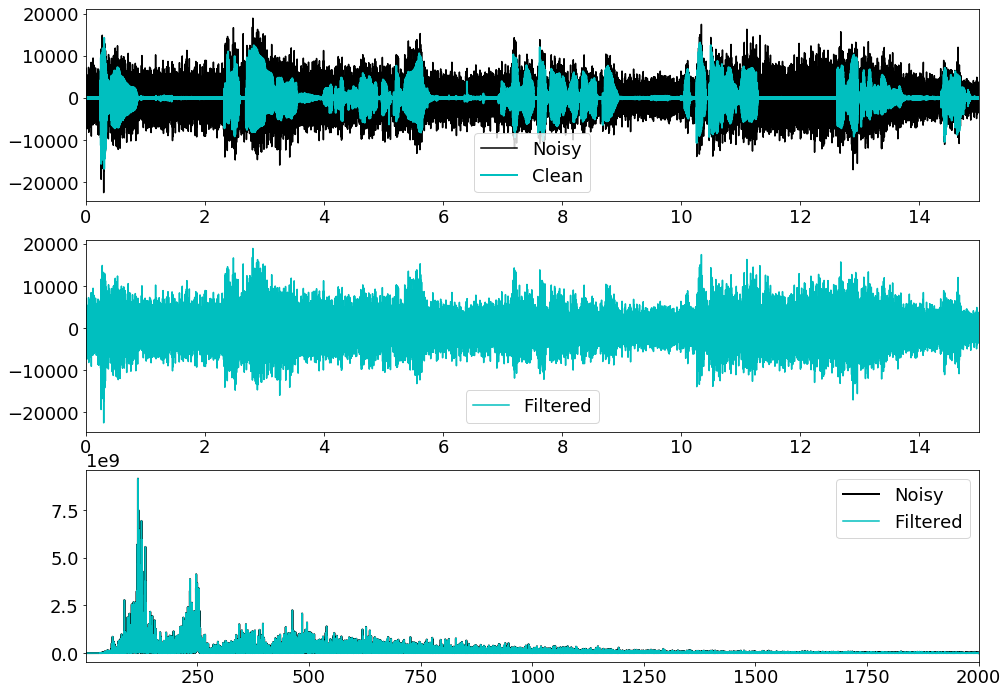

In [421]:
# # ::::::::::::::: PLOTS ::::::::::::::::::::::::::
fig, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t, noisy, color='k', LineWidth=1.5, label='Noisy')
plt.plot(t, clean, color='c', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t, ffilt, color='c', LineWidth=1.5, label='Filtered')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L], PSD[L], color='k', LineWidth=2, label='Noisy')
plt.plot(freq[L], PSDclean[L], color='c', LineWidth=1.5, label='Filtered')
plt.xlim(freq[L[0]], 2000)
plt.legend()

plt.show()


In [202]:
IPython.display.Audio(data=ffilt, rate=clean_rate)

C:\Users\Breno.Silva\Anaconda3\lib\site-packages\IPython\lib\display.py:158: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)


## Parte 3 - Algoritmo proposto pelo professor

Processo para remocao de ruido que utiliza uma "mascara" obtida a partir da densidade espectral do ruido.

Algoritmo em linhas gerais:

### 1. Aplica FFT no audio (limpo + ruido)

### 2. Pega modulo e fase

### 3. Aplica filtro no modulo (vai atuar na amplitude) - RUIDO
    # obter carcateristica espectral do ruido (amplitude em modulo)
    # pegar a funcao dos picos (pontos) pois o threshold vai variar cfe for variando a frequencia
        # aplicar filtro passa baixas
        # ai vamos ter a mascara  
        # a partir disso subtrai audio - mascara (ou no caso, zera todos os valores que estiver abaixo da mascara)
        

### 4. Filtro vai gerar algum output, aí junta com a fase de antes e calcula a parte real e imaginaria

### 5. Faz a FFT inversa do passo 4

### 6.  Resultado eh o audio filtrado

### 0. Carrega sinais

In [424]:
import IPython
import matplotlib.pyplot as plt
import scipy
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
from numpy.fft import *
import numpy as np
from scipy import interpolate

plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size': 18})

clean_rate, clean = wavfile.read('voz.wav') # CLEAN
noise_rate, noise = wavfile.read('TRAFFIC.wav') # RUIDO

N = noise.shape[0] #[0]
print ("Complete Samplings N", N)

# quantos segundos eh o audio
type(N)
secs = N / float(noise_rate)
print ("secs", secs)

# intervalo entre cada sample
Ts = 1.0/noise_rate
print ("Timestep between samples Ts", Ts)

# pega numpy array
t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray

# dt = 0.001 # dt eh o intervalo de samples
# t = np.arange(0, 1, dt) # alterado para 10 para poder escutar
# clean = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # os picos serao em 50 e 120

## sinal limpo
#clean_rate, clean = wavfile.read('voz.wav')

# noise = 2.5*np.random.randn(len(t))

noisy = clean + noise

Complete Samplings N 720000
secs 15.0
Timestep between samples Ts 2.0833333333333333e-05


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: WavFileWarning: Chunk (non-data) not understood, skipping it.
  del sys.path[0]
C:\Users\Breno.Silva\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead


### 1. Aplica FFT no sinal composto (limpo + ruido) 
### 2. Pega modulo e fase

C:\Users\Breno.Silva\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


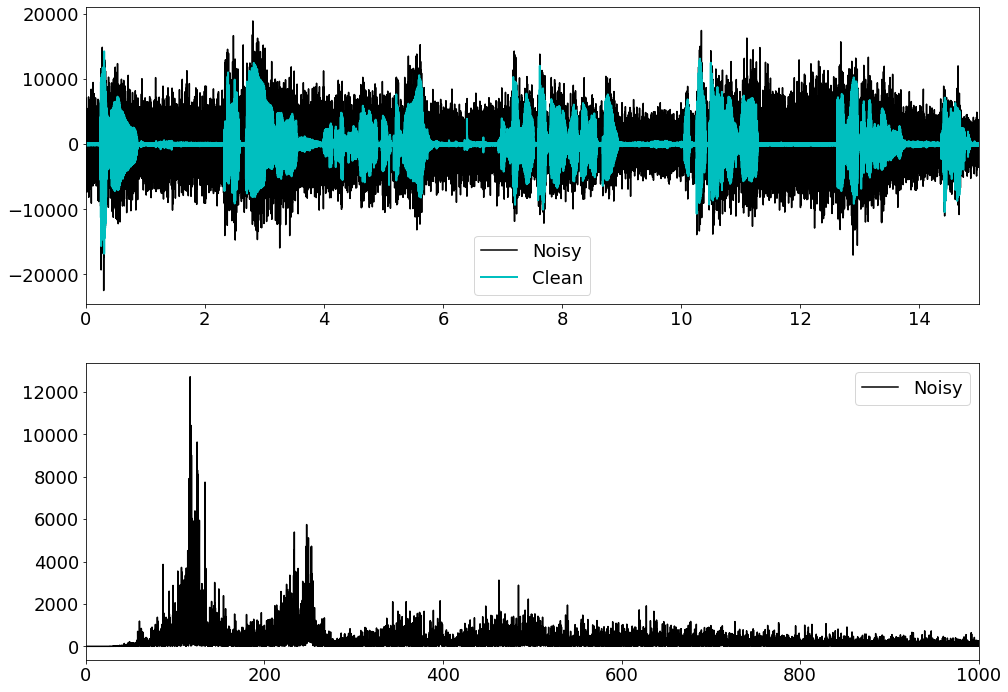

In [442]:
# Computa a FFT; t -> tempo
n = len(t)
fhat = np.fft.fft(noisy,n)

# Obtém a densidade espectral em módulo 
signalPSD = np.abs(fhat) ** 2
signalPSD /= len(fhat)**2

## Get Phase
signalPhase = np.angle(fhat)

# create x-axis of frequencies
freq = (1/(Ts*n)) * np.arange(n)
# only plot the first half of
L = np.arange(1, np.floor(n/2), dtype = 'int')

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(t, noisy, color='k', LineWidth=1.5, label='Noisy')
plt.plot(t, clean, color='c', LineWidth=2, label='Clean')
plt.xlim(t[0], t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L], signalPSD[L], color='k', LineWidth=1.5, label='Noisy')
plt.xlim(0, 1000)
plt.legend()

plt.show()

### 3. Aplica filtro no modulo (vai atuar na amplitude) - RUIDO
    # obter carcateristica espectral do ruido (amplitude em modulo)
    # pegar a funcao dos picos (pontos) pois o threshold vai variar cfe for variando a frequencia
        # aplicar filtro passa baixas
        # ai vamos ter a mascara  
        # a partir disso subtrai audio - mascara (ou no caso, zera todos os valores que estiver abaixo da mascara)

parei


C:\Users\Breno.Silva\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


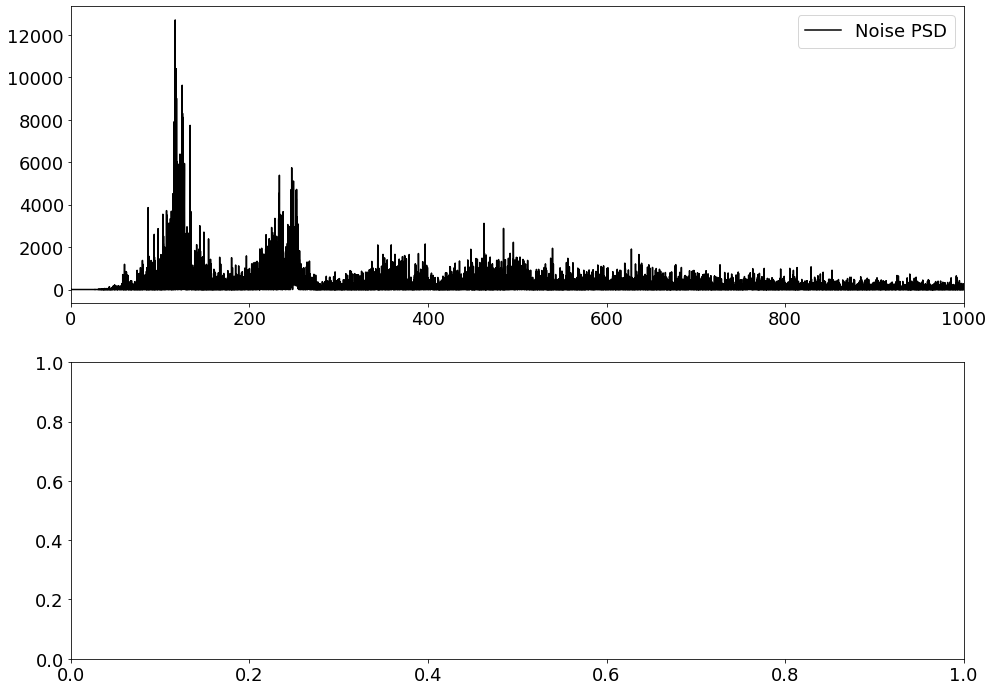

In [455]:
n = len(t)
# compute the fft in the noisy signal
noisefhat = np.fft.fft(noise,n)
#print(noise)

## Get Power Spectral Density
noisePSD = np.abs(noisefhat) ** 2
noisePSD /= len(noisefhat)**2

### versao dummy ##### 
output = [None]
dummyCounter = 0
for v in noisePSD:
    if signalPSD[dummyCounter] > v:
        output.append(signalPSD[dummyCounter])
    else:
        output.append(0)
    dummyCounter = dummyCounter + 1

del output[-1]
npOutput = np.array(output)

#ffilt2 = np.fft.ifft(ffilt) # faz a FFT inversa para pegar o sinal filtrado

#print(ffilt2)

# create x-axis of frequencies
freq2 = (1/(Ts*n)) * np.arange(n)
# only plot the first half of
L2 = np.arange(1, np.floor(n/2), dtype = 'int')
# print(freq2)

# from scipy.interpolate import interp1d

# eq = interp1d(freq2, noisePSD, fill_value="extrapolate")

# #xnew = np.linspace(0, len(freq2)-1, num=41, endpoint=True)
# xnew = np.arange(0, len(freq2), 0.1)
# ynew = eq(xnew)

# plt.plot(freq2, noisePSD, 'o', xnew, ynew,'-')

fig, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.plot(freq2[L2], npOutput[L2], color='k', LineWidth=1.5, label='Noise PSD')
plt.xlim(0, 1000)
plt.legend()

# plt.sca(axs[1])
# plt.plot(t, ffilt2, color='c', LineWidth=1.5, label='Filtered')
# plt.xlim(0, 1000)
# plt.legend()

plt.show()